In [ ]:
%pip install pydub
%pip install tensorflow-io

Code to download the songs based off the given directory to exportify csv

In [ ]:
import urllib.request
import requests
import pandas as pd
import numpy as np

np.random.seed(42)
likes = pd.read_csv("./ml_likes.csv")
dislikes = pd.read_csv("./ml_dislikes.csv")
likes_links = likes.loc[:, "Track Preview URL"]
dislikes_links = dislikes.loc[:, "Track Preview URL"]
likes_size = likes_links.shape[0]
dislikes_size = dislikes_links.shape[0]
likes_dist = np.random.randint(0, likes_size, (likes_size))
dislikes_dist = np.random.randint(0, dislikes_size, (dislikes_size))
likes_train_ind = likes_dist[0:likes_size//2]
likes_test_ind = likes_dist[likes_size//2:likes_size-1]
dislikes_train_ind = dislikes_dist[0:likes_size//2]
dislikes_test_ind = dislikes_dist[likes_size//2:likes_size-1]

temp1 = []
temp2 = []
for i in likes_train_ind:
    temp1.append(likes_links[i])
for j in dislikes_train_ind:
    temp2.append(dislikes_links[j])
likes_train_data = np.array(temp1)
dislikes_train_data = np.array(temp2)
temp1 = []
temp2 = []
for i in likes_test_ind:
    temp1.append(likes_links[i])
for j in dislikes_test_ind:
    temp2.append(dislikes_links[j])
likes_test_data = np.array(temp1)
dislikes_test_data = np.array(temp2)

#Get training data for likes
for k in range(len(likes_train_data)):
    try:
        song_preview = requests.get(likes_train_data[k])
        file_path = "liked_songs/train_data/sample_" + str(k) + ".wav"
        with open(file_path, 'wb') as f:
            f.write(song_preview.content)
    except:
        print("song had no preview link")

#get test data for likes
for k in range(len(likes_test_data)):
    try:
        song_preview = requests.get(likes_test_data[k])
        file_path = "liked_songs/test_data/sample_" + str(k) + ".wav"
        with open(file_path, 'wb') as f:
            f.write(song_preview.content)
    except:
        print("song (" + str(k) + ") had no preview link")

#get training data for dislikes
for k in range(len(dislikes_train_data)):
    try:
        song_preview = requests.get(dislikes_train_data[k])
        file_path = "disliked_songs/train_data/sample_" + str(k) + ".wav"
        with open(file_path, 'wb') as f:
            f.write(song_preview.content)
    except:
        print("song (" + str(k) + ") had no preview link")

#get training data for dislikes
for k in range(len(dislikes_test_data)):
    try:
        song_preview = requests.get(dislikes_test_data[k])
        file_path = "disliked_songs/test_data/sample_" + str(k) + ".wav"
        with open(file_path, 'wb') as f:
            f.write(song_preview.content)
    except:
        print("song (" + str(k) + ") had no preview link")




Import dependencies

In [ ]:
from google.colab import drive
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio
import pydub
import numpy as np

Mount Google drive

In [ ]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load data

In [ ]:
def load_and_split_sample(filepath):
    #load audio via tensorflow
    audio = pydub.AudioSegment.from_mp3(filepath)
    audio = np.array(audio.get_array_of_samples())
    # print(audio.shape)
    tensor = tf.convert_to_tensor(audio)
    # audio = tf.io.read_file(filepath)
    # tensor = tf.squeeze(tensor, axis=[-1])
    # audio_size = audio.shape[0]
    # pt_1 = audio[:audio_size//3]
    # pt_2 = audio[audio_size//3:(audio_size//3)*2]
    # pt_3 = audio[(audio_size//3)*2:]
    # pt_1_tensor = tf.squeeze(pt_1, axis=[-1])
    # pt_2_tensor = tf.squeeze(pt_2, axis=[-1])
    # pt_3_tensor = tf.squeeze(pt_3, axis=[-1])
    # return pt_1_tensor, pt_2_tensor, pt_3_tensor
    return audio

AUTOTUNE = tf.data.experimental.AUTOTUNE
# test sample
test_file = os.path.join('/content/drive/MyDrive/prac_proj/data/liked_songs','train_data','sample_0.mp3')
test_file2 = os.path.join('/content/drive/MyDrive/prac_proj/data/liked_songs','train_data','sample_4.mp3')
test_file3 = os.path.join('/content/drive/MyDrive/prac_proj/data/liked_songs','train_data','sample_6.mp3')

print(os.path.exists(test_file))
clip = load_and_split_sample(test_file)
print(clip)
# clip1, clip2, clip3 = load_and_split_sample(test_file)


True
[ 151  272  211 ... -206   47 -157]


Plot to verify

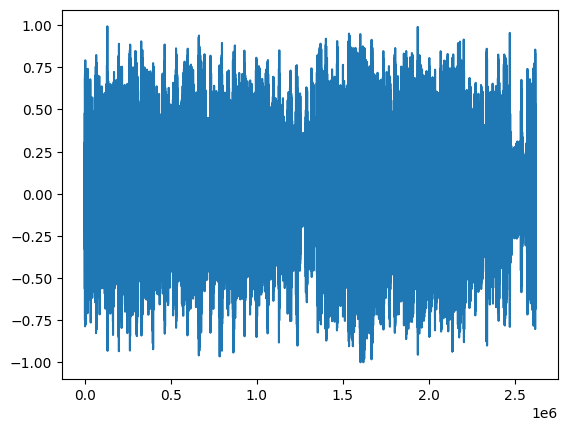

In [ ]:

# tensor1 = tf.cast(clip1, tf.float32) / 32768.0
# tensor2 = tf.cast(clip2, tf.float32) / 32768.0
# tensor3 = tf.cast(clip3, tf.float32) / 32768.0
tensor = tf.cast(clip, tf.float32) / 32768.0

plt.figure()
plt.plot(tensor.numpy())
# plt.plot(tensor1.numpy())
# plt.plot(tensor2.numpy())
# plt.plot(tensor3.numpy())
plt.show()


Convert to spectrogram

In [ ]:

def split_clips(dir_path):
    # clip1, clip2, clip3 = load_and_split_sample(test_file)
    clip = load_and_split_sample(test_file)
    slices = tf.split(clip, 6)
    # slices = tf.stack(slices)
    tensor = tf.cast(slices, tf.float32) / 32768.0
    # tensor1 = tf.cast(clip1, tf.float32) / 32768.0
    # tensor2 = tf.cast(clip2, tf.float32) / 32768.0
    # tensor3 = tf.cast(clip3, tf.float32) / 32768.0
    #plot waveforms to verify loading
    # plt.figure()
    # plt.plot(tensor1.numpy())
    # plt.plot(tensor2.numpy())
    # plt.plot(tensor3.numpy())
    # plt.show()
    # print(tensor)

    # spectrogram1 = tfio.audio.spectrogram(
    #     tensor1, nfft=512, window=512, stride=256)
    # spectrogram2 = tfio.audio.spectrogram(
    #     tensor2, nfft=512, window=512, stride=256)
    # spectrogram3 = tfio.audio.spectrogram(
    #     tensor3, nfft=512, window=512, stride=256)



    # plt.imshow(tf.math.log(spectrogram2).numpy())

    #old return
    # return spectrogram1, spectrogram2, spectrogram3, label
    #new return
    return tensor

In [ ]:

def split_clips2(dir_path):
    # clip1, clip2, clip3 = load_and_split_sample(test_file)
    clip = load_and_split_sample(test_file)
    slices = tf.split(clip, 3)
    # slices = tf.stack(slices)
    tensor = tf.cast(slices, tf.float32) / 32768.0
    # tensor1 = tf.cast(clip1, tf.float32) / 32768.0
    # tensor2 = tf.cast(clip2, tf.float32) / 32768.0
    # tensor3 = tf.cast(clip3, tf.float32) / 32768.0
    #plot waveforms to verify loading
    # plt.figure()
    # plt.plot(tensor1.numpy())
    # plt.plot(tensor2.numpy())
    # plt.plot(tensor3.numpy())
    # plt.show()
    # print(tensor)

    # spectrogram1 = tfio.audio.spectrogram(
    #     tensor1, nfft=512, window=512, stride=256)
    # spectrogram2 = tfio.audio.spectrogram(
    #     tensor2, nfft=512, window=512, stride=256)
    # spectrogram3 = tfio.audio.spectrogram(
    #     tensor3, nfft=512, window=512, stride=256)



    # plt.imshow(tf.math.log(spectrogram2).numpy())

    #old return
    # return spectrogram1, spectrogram2, spectrogram3, label
    #new return
    return tensor

In [ ]:

def split_clips3(dir_path):
    # clip1, clip2, clip3 = load_and_split_sample(test_file)
    clip = load_and_split_sample(test_file)
    # slices = tf.split(clip, 6)
    # slices = tf.stack(slices)
    tensor = tf.cast(clip, tf.float32) / 32768.0
    # tensor1 = tf.cast(clip1, tf.float32) / 32768.0
    # tensor2 = tf.cast(clip2, tf.float32) / 32768.0
    # tensor3 = tf.cast(clip3, tf.float32) / 32768.0
    #plot waveforms to verify loading
    # plt.figure()
    # plt.plot(tensor1.numpy())
    # plt.plot(tensor2.numpy())
    # plt.plot(tensor3.numpy())
    # plt.show()
    # print(tensor)

    # spectrogram1 = tfio.audio.spectrogram(
    #     tensor1, nfft=512, window=512, stride=256)
    # spectrogram2 = tfio.audio.spectrogram(
    #     tensor2, nfft=512, window=512, stride=256)
    # spectrogram3 = tfio.audio.spectrogram(
    #     tensor3, nfft=512, window=512, stride=256)



    # plt.imshow(tf.math.log(spectrogram2).numpy())

    #old return
    # return spectrogram1, spectrogram2, spectrogram3, label
    #new return
    return tensor

In [ ]:
def to_spectrogram(tensor):
      spectrogram = tfio.audio.spectrogram(
        tensor, nfft=512, window=512, stride=256)
      spectrogram = tf.expand_dims(spectrogram, axis=-1)
      return spectrogram

In [ ]:
def to_spectrogram2(tensor, label):
      tensor = split_clips3(tensor)
      spectrogram = tfio.audio.spectrogram(
        tensor, nfft=512, window=512, stride=256)
      spectrogram = tf.expand_dims(spectrogram, axis=-1)
      return spectrogram, label

Plots to see current stat

tf.Tensor(
[[ 0.00460815  0.00830078  0.00643921 ...  0.27670288  0.17132568
   0.2767334 ]
 [ 0.17929077  0.25247192  0.17788696 ...  0.2508545   0.5161133
   0.18655396]
 [ 0.2713623  -0.07861328 -0.23501587 ... -0.08059692 -0.11813354
  -0.06323242]
 [-0.09588623 -0.06890869 -0.0776062  ... -0.21151733 -0.19491577
  -0.21258545]
 [-0.23760986 -0.17773438 -0.24804688 ... -0.30145264 -0.44662476
  -0.33255005]
 [-0.51016235 -0.37460327 -0.536438   ... -0.00628662  0.00143433
  -0.00479126]], shape=(6, 436776), dtype=float32)
tf.Tensor(
[[ 0.00460815  0.00830078  0.00643921 ...  0.27670288  0.17132568
   0.2767334 ]
 [ 0.17929077  0.25247192  0.17788696 ...  0.2508545   0.5161133
   0.18655396]
 [ 0.2713623  -0.07861328 -0.23501587 ... -0.08059692 -0.11813354
  -0.06323242]
 [-0.09588623 -0.06890869 -0.0776062  ... -0.21151733 -0.19491577
  -0.21258545]
 [-0.23760986 -0.17773438 -0.24804688 ... -0.30145264 -0.44662476
  -0.33255005]
 [-0.51016235 -0.37460327 -0.536438   ... -0.00628662

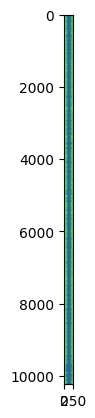

In [ ]:

#show image of one of the spectrograms to verify loading
spectrogram = to_spectrogram(tensor)
plt.figure()
plt.imshow(tf.math.log(spectrogram).numpy())

#alter frequencies if necessary
# freq_mask1 = tfio.audio.freq_mask(spectrogram1, param=10)
# freq_mask2 = tfio.audio.freq_mask(spectrogram2, param=10)
# freq_mask1 = tfio.audio.freq_mask(spectrogram3, param=10)
#

# plot one with frequency mask if necessary
# plt.figure()
# plt.imshow(freq_mask.numpy())
split = split_clips(test_file)
split2 = split_clips(test_file2)
# split = tf.stack(split, axis=0)
print(split)
print(split2)
together = tf.concat([split, split2], 0)
print(together)
split3 = split_clips(test_file3)
together = tf.concat([together, split3], 0)
print(together)

In [ ]:




def prep_datasets_train():
    #create paths to training data
    likes_path = os.path.join("/content/drive/MyDrive/prac_proj/data/liked_songs", "train_data")
    dislikes_path = os.path.join("/content/drive/MyDrive/prac_proj/data/disliked_songs", "train_data")
    # print(os.path.exists(likes_path+"/sample_0.mp3"))
    # print(os.path.exists(dislikes_path))

    #load relevant samples
    like_set = split_clips(likes_path+"/sample_0.mp3")
    print(like_set)
    like_files = os.listdir(likes_path)
    # like_data = tf.data.Dataset.list_files(likes_path+"/*.mp3")
    # dislike_data = tf.data.Dataset.list_files(dislikes_path+"/*.mp3")
    for x in range(200,len(like_files)):
      file_name = like_files[x]
      # print(str(x) + ' : ' + str(len(like_files)))
      temp_path = os.path.join(likes_path, file_name)
      # print(temp_path)
      # print(os.path.exists(temp_path))
      temp_tensor = split_clips(temp_path)
      like_set = tf.concat([like_set, temp_tensor], 0)

    print('done likes train')
    print(like_set)

    dislike_set = split_clips(dislikes_path+"/sample_0.mp3")
    # print(dislike_set)
    dislike_files = os.listdir(dislikes_path)
    # like_data = tf.data.Dataset.list_files(likes_path+"/*.mp3")
    # dislike_data = tf.data.Dataset.list_files(dislikes_path+"/*.mp3")
    for x in range(200,len(dislike_files)):
      # print(x)
      file_name = dislike_files[x]
      temp_path = os.path.join(dislikes_path, file_name)
      # print(temp_path)
      temp_tensor = split_clips(temp_path)
      dislike_set = tf.concat([dislike_set, temp_tensor], 0)
    print('done dislikes train')
    print(dislike_set)

    #convert to datasets
    like_data = tf.data.Dataset.from_tensor_slices(like_set)
    dislike_data = tf.data.Dataset.from_tensor_slices(dislike_set)
    # like_data = like_data.map(split_clips)
    # dislike_data = dislike_data.map(split_clips)
    # print(like_data)
    # #-----------------------
    # dataset_to_numpy = list(like_data.as_numpy_iterator())
    # shape = tf.shape(dataset_to_numpy)
    # print(shape)
    # #---------------------
    # dislike_data = tf.concat(dislike_data, 2)
    # like_data = tf.concat(like_data, 2)
    like_spect = like_data.map(to_spectrogram, num_parallel_calls=AUTOTUNE)
    dislike_spect = dislike_data.map(to_spectrogram, num_parallel_calls=AUTOTUNE)

    #tensors are currently in groups of 6 and need to be flattened to 1 column of tensors
    # like_spect = tf.stack(like_spect)
    # dislike_spect = tf.stack(dislike_spect)

    # like_shape = tf.shape(like_spect)
    # dislike_shape = tf.shape(dislike_spect)
    # like_spect = tf.reshape(like_spect, [])
    # dislike_spect = tf.reshape([])

    likes = tf.data.Dataset.zip((like_spect, tf.data.Dataset.from_tensor_slices(tf.ones(len(like_data)))))
    dislikes = tf.data.Dataset.zip((dislike_spect, tf.data.Dataset.from_tensor_slices(tf.zeros(len(dislike_data)))))

    train_data = likes.concatenate(dislikes)

    train_data = train_data.cache().shuffle(buffer_size=100)
    train_data = train_data.batch(4)
    train_data = train_data.prefetch(buffer_size=AUTOTUNE)


    return train_data

In [ ]:




def prep_datasets_train2():
    #create paths to training data

    #create paths to training data
    likes_path = os.path.join("/content/drive/MyDrive/prac_proj/data/liked_songs", "train_data")
    dislikes_path = os.path.join("/content/drive/MyDrive/prac_proj/data/disliked_songs", "train_data")
    # print(os.path.exists(likes_path+"/sample_0.mp3"))
    # print(os.path.exists(dislikes_path))

    #load relevant samples
    # like_set = split_clips(likes_path+"/sample_0.mp3")
    # print(like_set)
    # like_files = os.listdir(likes_path)
    # # like_data = tf.data.Dataset.list_files(likes_path+"/*.mp3")
    # # dislike_data = tf.data.Dataset.list_files(dislikes_path+"/*.mp3")
    # for x in range(1,len(like_files)):
    #   file_name = like_files[x]
    #   # print(str(x) + ' : ' + str(len(like_files)))
    #   temp_path = os.path.join(likes_path, file_name)
    #   # print(temp_path)
    #   # print(os.path.exists(temp_path))
    #   temp_tensor = split_clips(temp_path)
    #   like_set = tf.concat([like_set, temp_tensor], 0)

    # print('done likes train')
    # print(like_set)

    # dislike_set = split_clips(dislikes_path+"/sample_0.mp3")
    # # print(dislike_set)
    # dislike_files = os.listdir(dislikes_path)
    like_data = tf.data.Dataset.list_files(likes_path+"/*.mp3")
    dislike_data = tf.data.Dataset.list_files(dislikes_path+"/*.mp3")
    likes = tf.data.Dataset.zip((like_data, tf.data.Dataset.from_tensor_slices(tf.ones(len(like_data)))))
    dislikes = tf.data.Dataset.zip((dislike_data, tf.data.Dataset.from_tensor_slices(tf.zeros(len(dislike_data)))))
    # for x in range(1,len(dislike_files)):
    #   # print(x)
    #   file_name = dislike_files[x]
    #   temp_path = os.path.join(dislikes_path, file_name)
    #   # print(temp_path)
    #   temp_tensor = split_clips(temp_path)
    #   dislike_set = tf.concat([dislike_set, temp_tensor], 0)
    # print('done dislikes train')
    # print(dislike_set)

    #convert to datasets
    # like_data = tf.data.Dataset.from_tensor_slices(like_set)
    # dislike_data = tf.data.Dataset.from_tensor_slices(dislike_set)
    # like_data = like_data.map(split_clips3)
    # dislike_data = dislike_data.map(split_clips3)
    # print(like_data)
    # #-----------------------
    # dataset_to_numpy = list(like_data.as_numpy_iterator())
    # shape = tf.shape(dataset_to_numpy)
    # print(shape)
    # #---------------------
    # dislike_data = tf.concat(dislike_data, 2)
    # like_data = tf.concat(like_data, 2)
    like_spect = likes.map(to_spectrogram2, num_parallel_calls=AUTOTUNE)
    dislike_spect = dislikes.map(to_spectrogram2, num_parallel_calls=AUTOTUNE)

    #tensors are currently in groups of 6 and need to be flattened to 1 column of tensors
    # like_spect = tf.stack(like_spect)
    # dislike_spect = tf.stack(dislike_spect)

    # like_shape = tf.shape(like_spect)
    # dislike_shape = tf.shape(dislike_spect)
    # like_spect = tf.reshape(like_spect, [])
    # dislike_spect = tf.reshape([])


    train_data = like_spect.concatenate(dislike_spect)

    train_data = train_data.shuffle(buffer_size=100)
    train_data = train_data.batch(4)
    train_data = train_data.prefetch(buffer_size=AUTOTUNE)


    return train_data

In [ ]:
train_data = prep_datasets_train()

tf.Tensor(
[[ 0.00460815  0.00830078  0.00643921 ...  0.27670288  0.17132568
   0.2767334 ]
 [ 0.17929077  0.25247192  0.17788696 ...  0.2508545   0.5161133
   0.18655396]
 [ 0.2713623  -0.07861328 -0.23501587 ... -0.08059692 -0.11813354
  -0.06323242]
 [-0.09588623 -0.06890869 -0.0776062  ... -0.21151733 -0.19491577
  -0.21258545]
 [-0.23760986 -0.17773438 -0.24804688 ... -0.30145264 -0.44662476
  -0.33255005]
 [-0.51016235 -0.37460327 -0.536438   ... -0.00628662  0.00143433
  -0.00479126]], shape=(6, 436776), dtype=float32)
done likes train
tf.Tensor(
[[ 0.00460815  0.00830078  0.00643921 ...  0.27670288  0.17132568
   0.2767334 ]
 [ 0.17929077  0.25247192  0.17788696 ...  0.2508545   0.5161133
   0.18655396]
 [ 0.2713623  -0.07861328 -0.23501587 ... -0.08059692 -0.11813354
  -0.06323242]
 ...
 [-0.09588623 -0.06890869 -0.0776062  ... -0.21151733 -0.19491577
  -0.21258545]
 [-0.23760986 -0.17773438 -0.24804688 ... -0.30145264 -0.44662476
  -0.33255005]
 [-0.51016235 -0.37460327 -0.53

DO NOT RUN SAVE FOR DATASETS IT IS BROKEN

In [ ]:
#save train dataset to files so don't have to reprocess into the seperate sets
# save_path_train = os.path.join('drive', 'MyDrive', 'prac_proj', 'saved_data_train')
# train_data.save(save_path_train)

In [ ]:
def prep_datasets_test():
    likes_path = os.path.join("/content/drive/MyDrive/prac_proj/data/liked_songs", "test_data")
    dislikes_path = os.path.join("/content/drive/MyDrive/prac_proj/data/disliked_songs", "test_data")
    # print(os.path.exists(likes_path))
    # print(os.path.exists(dislikes_path))


    #     #create paths to training data
    # likes_path = os.path.join("/content/drive/MyDrive/practicum_proj/data/liked_songs", "train_data")
    # dislikes_path = os.path.join("/content/drive/MyDrive/practicum_proj/data/disliked_songs", "train_data")
    # print(os.path.exists(likes_path+"/sample_0.mp3"))
    # print(os.path.exists(dislikes_path))

    #load relevant samples
    like_set = split_clips(likes_path+"/sample_0.mp3")
    print(like_set)
    like_files = os.listdir(likes_path)
    # like_data = tf.data.Dataset.list_files(likes_path+"/*.mp3")
    # dislike_data = tf.data.Dataset.list_files(dislikes_path+"/*.mp3")
    for x in range(850,len(like_files)):
      file_name = like_files[x]
      # print(file_name)
      temp_path = os.path.join(likes_path, file_name)
      # print(temp_path)
      # print(os.path.exists(temp_path))
      temp_tensor = split_clips(temp_path)
      like_set = tf.concat([like_set, temp_tensor], 0)
    print('done likes test')
    print(like_set)

    dislike_set = split_clips(dislikes_path+"/sample_0.mp3")
    # print(dislike_set)
    dislike_files = os.listdir(dislikes_path)
    # like_data = tf.data.Dataset.list_files(likes_path+"/*.mp3")
    # dislike_data = tf.data.Dataset.list_files(dislikes_path+"/*.mp3")
    for x in range(850,len(like_files)):
      file_name = dislike_files[x]
      temp_path = os.path.join(dislikes_path, file_name)
      # print(temp_path)
      temp_tensor = split_clips(temp_path)
      dislikeset = tf.concat([dislike_set, temp_tensor], 0)
    print('done dislikes test')
    print(dislike_set)

    #convert to datasets
    like_data = tf.data.Dataset.from_tensor_slices(like_set)
    dislike_data = tf.data.Dataset.from_tensor_slices(dislike_set)


    # #create relevant test datasets
    # like_data = tf.data.Dataset.list_files(likes_path+"/*.mp3")
    # dislike_data = tf.data.Dataset.list_files(dislikes_path+"/*.mp3")
    # like_data = like_data.map(split_clips)
    # dislike_data = dislike_data.map(split_clips)
    # # #-----------------------
    # # dataset_to_numpy = list(like_data.as_numpy_iterator())
    # # shape = tf.shape(dataset_to_numpy)
    # # print(shape)
    # # #---------------------
    # # dislike_data = tf.concat(dislike_data, 2)
    # like_data = tf.concat(like_data, 2)
    like_spect = like_data.map(to_spectrogram, num_parallel_calls=AUTOTUNE)
    dislike_spect = dislike_data.map(to_spectrogram, num_parallel_calls=AUTOTUNE)

    # # #tensors are currently in groups of 6 and need to be flattened to 1 column of tensors
    # # like_spect = tf.stack(like_spect)
    # # dislike_spect = tf.stack(dislike_spect)

    # # like_shape = tf.shape(like_spect)
    # # dislike_shape = tf.shape(dislike_spect)
    # # like_spect = tf.reshape(like_spect, [])
    # # dislike_spect = tf.reshape([])

    likes = tf.data.Dataset.zip((like_spect, tf.data.Dataset.from_tensor_slices(tf.ones(len(like_data)))))
    dislikes = tf.data.Dataset.zip((dislike_spect, tf.data.Dataset.from_tensor_slices(tf.zeros(len(dislike_data)))))

    test_data = likes.concatenate(dislikes)
    test_data = test_data.shuffle(buffer_size=100).batch(4).prefetch(buffer_size=AUTOTUNE)
    return test_data

In [ ]:
def prep_datasets_test2():
    likes_path = os.path.join("/content/drive/MyDrive/prac_proj/data/liked_songs", "test_data")
    dislikes_path = os.path.join("/content/drive/MyDrive/prac_proj/data/disliked_songs", "test_data")
    # print(os.path.exists(likes_path))
    # print(os.path.exists(dislikes_path))


    #     #create paths to training data
    # likes_path = os.path.join("/content/drive/MyDrive/practicum_proj/data/liked_songs", "train_data")
    # dislikes_path = os.path.join("/content/drive/MyDrive/practicum_proj/data/disliked_songs", "train_data")
    # print(os.path.exists(likes_path+"/sample_0.mp3"))
    # print(os.path.exists(dislikes_path))

    #load relevant samples
    # like_set = split_clips(likes_path+"/sample_0.mp3")
    # print(like_set)
    # like_files = os.listdir(likes_path)
    # # like_data = tf.data.Dataset.list_files(likes_path+"/*.mp3")
    # # dislike_data = tf.data.Dataset.list_files(dislikes_path+"/*.mp3")
    # for x in range(2,len(like_files)):
    #   file_name = like_files[x]
    #   # print(file_name)
    #   temp_path = os.path.join(likes_path, file_name)
    #   # print(temp_path)
    #   # print(os.path.exists(temp_path))
    #   temp_tensor = split_clips(temp_path)
    #   like_set = tf.concat([like_set, temp_tensor], 0)
    # print('done likes test')
    # print(like_set)

    # dislike_set = split_clips(dislikes_path+"/sample_0.mp3")
    # # print(dislike_set)
    # dislike_files = os.listdir(dislikes_path)
    like_files = tf.data.Dataset.list_files(likes_path+"/*.mp3")
    dislike_files = tf.data.Dataset.list_files(dislikes_path+"/*.mp3")

    likes = tf.data.Dataset.zip((like_files, tf.data.Dataset.from_tensor_slices(tf.ones(len(like_files)))))
    dislikes = tf.data.Dataset.zip((dislike_files, tf.data.Dataset.from_tensor_slices(tf.zeros(len(dislike_files)))))

    # for x in range(2,len(like_files)):
    #   file_name = dislike_files[x]
    #   temp_path = os.path.join(dislikes_path, file_name)
    #   # print(temp_path)
    #   temp_tensor = split_clips(temp_path)
    #   dislikeset = tf.concat([dislike_set, temp_tensor], 0)
    # print('done dislikes test')
    # print(dislike_set)

    #convert to datasets
    # like_data = tf.data.Dataset.from_tensor_slices(like_set)
    # dislike_data = tf.data.Dataset.from_tensor_slices(dislike_set)


    # #create relevant test datasets
    # like_data = tf.data.Dataset.list_files(likes_path+"/*.mp3")
    # dislike_data = tf.data.Dataset.list_files(dislikes_path+"/*.mp3")
    # like_data = like_files.map(split_clips3)
    # dislike_data = dislike_files.map(split_clips3)
    # # #-----------------------
    # # dataset_to_numpy = list(like_data.as_numpy_iterator())
    # # shape = tf.shape(dataset_to_numpy)
    # # print(shape)
    # # #---------------------
    # # dislike_data = tf.concat(dislike_data, 2)
    # like_data = tf.concat(like_data, 2)
    like_spect = likes.map(to_spectrogram2, num_parallel_calls=AUTOTUNE)
    dislike_spect = dislikes.map(to_spectrogram2, num_parallel_calls=AUTOTUNE)

    # # #tensors are currently in groups of 6 and need to be flattened to 1 column of tensors
    # # like_spect = tf.stack(like_spect)
    # # dislike_spect = tf.stack(dislike_spect)

    # # like_shape = tf.shape(like_spect)
    # # dislike_shape = tf.shape(dislike_spect)
    # # like_spect = tf.reshape(like_spect, [])
    # # dislike_spect = tf.reshape([])
    test_data = like_spect.concatenate(dislike_spect)
    test_data = test_data.shuffle(buffer_size=100).batch(4).prefetch(buffer_size=AUTOTUNE)
    return test_data

In [ ]:
test_data = prep_datasets_test()

tf.Tensor(
[[ 0.00460815  0.00830078  0.00643921 ...  0.27670288  0.17132568
   0.2767334 ]
 [ 0.17929077  0.25247192  0.17788696 ...  0.2508545   0.5161133
   0.18655396]
 [ 0.2713623  -0.07861328 -0.23501587 ... -0.08059692 -0.11813354
  -0.06323242]
 [-0.09588623 -0.06890869 -0.0776062  ... -0.21151733 -0.19491577
  -0.21258545]
 [-0.23760986 -0.17773438 -0.24804688 ... -0.30145264 -0.44662476
  -0.33255005]
 [-0.51016235 -0.37460327 -0.536438   ... -0.00628662  0.00143433
  -0.00479126]], shape=(6, 436776), dtype=float32)
done likes test
tf.Tensor(
[[ 0.00460815  0.00830078  0.00643921 ...  0.27670288  0.17132568
   0.2767334 ]
 [ 0.17929077  0.25247192  0.17788696 ...  0.2508545   0.5161133
   0.18655396]
 [ 0.2713623  -0.07861328 -0.23501587 ... -0.08059692 -0.11813354
  -0.06323242]
 ...
 [-0.09588623 -0.06890869 -0.0776062  ... -0.21151733 -0.19491577
  -0.21258545]
 [-0.23760986 -0.17773438 -0.24804688 ... -0.30145264 -0.44662476
  -0.33255005]
 [-0.51016235 -0.37460327 -0.536

DO NOT RUN SAVES THEY ARE BROKEN

In [ ]:
#save test dataset to files so don't have to reprocess into the seperate sets
# save_path_test = os.path.join('drive', 'MyDrive', 'prac_proj', 'saved_data_test')
# test_data.save(save_path_test)

prepare filepaths into csv

No need to run below cells files have already been created

In [ ]:
# import pandas as pd

In [ ]:
# _BASE_DIR = '/content/drive/MyDrive/prac_proj/data'
# train_likes_path = os.path.join("/content/drive/MyDrive/prac_proj/data/liked_songs", "train_data")
# train_dislikes_path = os.path.join("/content/drive/MyDrive/prac_proj/data/disliked_songs", "train_data")
# like_files = os.listdir(train_likes_path)
# # print(train_likes_path)
# for x in range(len(like_files)):
#   # print(like_files[x])
#   like_files[x] = train_likes_path + '/' + like_files[x]
#   # print(like_files[x])
# like_files = np.array(like_files)
# ones = np.ones(np.shape(like_files))
# like_files = np.vstack((like_files, ones))
# like_files = np.delete(like_files, 0)

# dislike_files = os.listdir(train_dislikes_path)
# for x in range(len(dislike_files)):
#   dislike_files[x] = train_dislikes_path + '/' + dislike_files[x]
# dislike_files = np.array(dislike_files)
# zeros = np.zeros(np.shape(dislike_files))
# dislike_files = np.vstack((dislike_files, zeros))
# dislike_files = np.delete(dislike_files, 0)

# train_files = np.hstack((like_files, dislike_files))
# # print(train_files[0][0])
# print(train_files)
# df = pd.DataFrame(train_files)
# df.to_csv((_BASE_DIR + '/train_paths.csv'))
# # np.savetxt((_BASE_DIR + '/train_paths.csv'), train_files, delimiter=',')

# test_likes_path = os.path.join("/content/drive/MyDrive/prac_proj/data/liked_songs", "test_data")
# test_dislikes_path = os.path.join("/content/drive/MyDrive/prac_proj/data/disliked_songs", "test_data")
# like_files = os.listdir(test_likes_path)
# for x in range(len(like_files)):
#   like_files[x] = test_likes_path + '/' + like_files[x]
# like_files = np.array(like_files)
# ones = np.ones(np.shape(like_files))
# like_files = np.vstack((like_files, ones))
# like_files = np.delete(like_files, 0)

# dislike_files = os.listdir(test_dislikes_path)
# for x in range(len(dislike_files)):
#   dislike_files[x] = test_dislikes_path + '/' + dislike_files[x]
# dislike_files = np.array(dislike_files)
# zeros = np.zeros(np.shape(dislike_files))
# dislike_files = np.vstack((dislike_files, zeros))
# dislike_files = np.delete(dislike_files, 0)

# test_files = np.hstack((like_files, dislike_files))
# print(test_files)
# df = pd.DataFrame(test_files)
# df.to_csv((_BASE_DIR + '/test_paths.csv'))
# # np.savetxt((_BASE_DIR + '/test_paths.csv'), train_files, delimiter=',')

SHARDING (code from https://towardsdatascience.com/how-to-build-efficient-audio-data-pipelines-with-tensorflow-2-0-b3133474c3c1)

In [ ]:
import argparse
import math
import pandas as pd

_BASE_DIR = '/content/drive/MyDrive/prac_proj/data'

_DEFAULT_META_CSV = os.path.join(_BASE_DIR, 'meta.csv')
_DEFAULT_OUTPUT_DIR = os.path.join(_BASE_DIR, 'tfrecords')

# _DEFAULT_DURATION = 4  # seconds
_DEFAULT_SAMPLE_RATE = 44100

_DEFAULT_TEST_SIZE = 0.1
# _DEFAULT_VAL_SIZE = 0.1

_DEFAULT_NUM_SHARDS_TRAIN = 16
_DEFAULT_NUM_SHARDS_TEST = 2
# _DEFAULT_NUM_SHARDS_VAL = 2

_SEED = 1


def _float_feature(list_of_floats):  # float32
    return tf.train.Feature(float_list=tf.train.FloatList(value=list_of_floats))


def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


class TFRecordsConverter:
    """Convert audio to TFRecords."""
    def __init__(self, meta, output_dir, n_shards_train, n_shards_test,
                duration, sample_rate, test_size):
        self.output_dir = output_dir
        self.n_shards_train = n_shards_train
        self.n_shards_test = n_shards_test
        # self.n_shards_val = n_shards_val
        self.duration = duration
        self.sample_rate = sample_rate

        if not os.path.exists(self.output_dir):
            os.makedirs(self.output_dir)

        df = pd.read_csv(meta, index_col=0)
        # Shuffle data by "sampling" the entire data-frame
        self.df = df.sample(frac=1, random_state=_SEED)

        n_samples = len(df)
        self.n_test = math.ceil(n_samples * test_size)
        # self.n_val = math.ceil(n_samples * val_size)
        self.n_train = n_samples - self.n_test

    def _get_shard_path(self, split, shard_id, shard_size):
        return os.path.join(self.output_dir,
                            '{}-{:03d}-{}.tfrecord'.format(split, shard_id,
                                                           shard_size))

    def _write_tfrecord_file(self, shard_path, indices):
        """Write TFRecord file."""
        with tf.io.TFRecordWriter(shard_path, options='ZLIB') as out:
            for index in indices:
                file_path = self.df.file_path.iloc[index]
                label = self.df.label.iloc[index]

                raw_audio = tf.io.read_file(file_path)
                audio, sample_rate = tf.audio.decode_wav(
                    raw_audio,
                    desired_channels=1,  # mono
                    desired_samples=self.sample_rate * self.duration)

                # Example is a flexible message type that contains key-value
                # pairs, where each key maps to a Feature message. Here, each
                # Example contains two features: A FloatList for the decoded
                # audio data and an Int64List containing the corresponding
                # label's index.
                example = tf.train.Example(features=tf.train.Features(feature={
                    'audio': _float_feature(audio.numpy().flatten().tolist()),
                    'label': _int64_feature(label)}))

                out.write(example.SerializeToString())

    def convert(self):
        """Convert to TFRecords.
        Partition data into training, testing and validation sets. Then,
        divide each data set into the specified number of TFRecords shards.
        """
        splits = ('train', 'test')
        split_sizes = (self.n_train, self.n_test)
        split_n_shards = (self.n_shards_train, self.n_shards_test)

        offset = 0
        for split, size, n_shards in zip(splits, split_sizes, split_n_shards):
            print('Converting {} set into TFRecord shards...'.format(split))
            shard_size = math.ceil(size / n_shards)
            cumulative_size = offset + size
            for shard_id in range(1, n_shards + 1):
                step_size = min(shard_size, cumulative_size - offset)
                shard_path = self._get_shard_path(split, shard_id, step_size)
                # Generate a subset of indices to select only a subset of
                # audio-files/labels for the current shard.
                file_indices = np.arange(offset, offset + step_size)
                self._write_tfrecord_file(shard_path, file_indices)
                offset += step_size

        print('Number of training examples: {}'.format(self.n_train))
        print('Number of testing examples: {}'.format(self.n_test))
        # print('Number of validation examples: {}'.format(self.n_val))
        print('TFRecord files saved to {}'.format(self.output_dir))


def parse_args():
    parser = argparse.ArgumentParser()
    parser.add_argument('-i', '--meta-data-csv', type=str, dest='meta_csv',
                        default=_DEFAULT_META_CSV,
                        help='File containing audio file-paths and '
                             'corresponding labels. (default: %(default)s)')
    parser.add_argument('-o', '--output-dir', type=str, dest='output_dir',
                        default=_DEFAULT_OUTPUT_DIR,
                        help='Output directory to store TFRecord files.'
                             '(default: %(default)s)')
    parser.add_argument('--num-shards-train', type=int,
                        dest='n_shards_train',
                        default=_DEFAULT_NUM_SHARDS_TRAIN,
                        help='Number of shards to divide training set '
                             'TFRecords into. (default: %(default)s)')
    parser.add_argument('--num-shards-test', type=int,
                        dest='n_shards_test',
                        default=_DEFAULT_NUM_SHARDS_TEST,
                        help='Number of shards to divide testing set '
                             'TFRecords into. (default: %(default)s)')
    parser.add_argument('--duration', type=int,
                        dest='duration',
                        default=_DEFAULT_DURATION,
                        help='The duration for the resulting fixed-length '
                             'audio-data in seconds. Longer files are '
                             'truncated. Shorter files are zero-padded. '
                             '(default: %(default)s)')
    parser.add_argument('--sample-rate', type=int,
                        dest='sample_rate',
                        default=_DEFAULT_SAMPLE_RATE,
                        help='The _actual_ sample-rate of wav-files to '
                             'convert. Re-sampling is not yet supported. '
                             '(default: %(default)s)')
    parser.add_argument('--test-size', type=float,
                        dest='test_size',
                        default=_DEFAULT_TEST_SIZE,
                        help='Fraction of examples in the testing set. '
                             '(default: %(default)s)')

    return parser.parse_args()


def main(args):
    converter = TFRecordsConverter(args.meta_csv,
                                   args.output_dir,
                                   args.n_shards_train,
                                   args.n_shards_test,
                                  #  args.n_shards_val,
                                   args.duration,
                                   args.sample_rate,
                                   args.test_size
                                  # ,args.val_size
                                   )
    converter.convert()


# if __name__ == '__main__':
#     main(parse_args())

In [ ]:
# for pick_spectrograms, pick_spect_labels in train_data.take(1):
#   break
# print(tf.shape(train_data))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

Specify the model and parameters

In [ ]:
input_shape = (1707, 257, 1)
# print('Input shape:', input_shape)

# Instantiate the `tf.keras.layers.Normalization` layer.
norm_layer = layers.Normalization()
# Fit the state of the layer to the spectrograms
# with `Normalization.adapt`.
norm_layer.adapt(data=train_data.map(map_func=lambda spec, label: spec))

model = Sequential([
    layers.Input(shape=input_shape),
    # Downsample the input.
    # layers.Resizing(512, 256),
    # Normalize.
    norm_layer,
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
    layers.Dropout(0.5),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 512, 256, 1)       0         
                                                                 
 normalization (Normalizati  (None, 512, 256, 1)       3         
 on)                                                             
                                                                 
 conv2d (Conv2D)             (None, 510, 254, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 508, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 254, 126, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 254, 126, 64)      0

compile the model

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

Train the model

In [ ]:
EPOCHS = 50
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=EPOCHS
)

save the model

In [ ]:
model.save(_BASE_DIR+'/DEEP-REC.keras', save_format='keras')

Load model from saved model(don't run if above code is loaded as model already loaded)

In [ ]:
model = tf.keras.models.load_model(_BASE_DIR+'/DEEP-REC.keras')

plot accuracy of model over time/epoch

In [ ]:
metrics = history.history
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch')
plt.ylabel('Loss [CrossEntropy]')

plt.subplot(1,2,2)
plt.plot(history.epoch, 100*np.array(metrics['accuracy']), 100*np.array(metrics['val_accuracy']))
plt.legend(['accuracy', 'val_accuracy'])
plt.ylim([0, 100])
plt.xlabel('Epoch')
plt.ylabel('Accuracy [%]')

make new test set to verify the quality of model using whole testing set

In [ ]:
def model_tests_1():
    likes_path = os.path.join("/content/drive/MyDrive/prac_proj/data/liked_songs", "test_data")
    dislikes_path = os.path.join("/content/drive/MyDrive/prac_proj/data/disliked_songs", "test_data")
    # print(os.path.exists(likes_path))
    # print(os.path.exists(dislikes_path))


    #     #create paths to training data
    # likes_path = os.path.join("/content/drive/MyDrive/practicum_proj/data/liked_songs", "train_data")
    # dislikes_path = os.path.join("/content/drive/MyDrive/practicum_proj/data/disliked_songs", "train_data")
    # print(os.path.exists(likes_path+"/sample_0.mp3"))
    # print(os.path.exists(dislikes_path))

    #load relevant samples
    like_set = split_clips(likes_path+"/sample_0.mp3")
    # print(like_set)
    like_files = os.listdir(likes_path)
    # like_data = tf.data.Dataset.list_files(likes_path+"/*.mp3")
    # dislike_data = tf.data.Dataset.list_files(dislikes_path+"/*.mp3")
    for x in range(1,550):
      file_name = like_files[x]
      # print(file_name)
      temp_path = os.path.join(likes_path, file_name)
      # print(temp_path)
      # print(os.path.exists(temp_path))
      temp_tensor = split_clips(temp_path)
      like_set = tf.concat([like_set, temp_tensor], 0)
    # print('done likes test')
    # print(like_set)

    dislike_set = split_clips(dislikes_path+"/sample_0.mp3")
    # print(dislike_set)
    dislike_files = os.listdir(dislikes_path)
    # like_data = tf.data.Dataset.list_files(likes_path+"/*.mp3")
    # dislike_data = tf.data.Dataset.list_files(dislikes_path+"/*.mp3")
    for x in range(1, 550):
      file_name = dislike_files[x]
      temp_path = os.path.join(dislikes_path, file_name)
      # print(temp_path)
      temp_tensor = split_clips(temp_path)
      dislikeset = tf.concat([dislike_set, temp_tensor], 0)
    # print('done dislikes test')
    # print(dislike_set)

    #convert to datasets
    like_data = tf.data.Dataset.from_tensor_slices(like_set)
    dislike_data = tf.data.Dataset.from_tensor_slices(dislike_set)


    # #create relevant test datasets
    # like_data = tf.data.Dataset.list_files(likes_path+"/*.mp3")
    # dislike_data = tf.data.Dataset.list_files(dislikes_path+"/*.mp3")
    # like_data = like_data.map(split_clips)
    # dislike_data = dislike_data.map(split_clips)
    # # #-----------------------
    # # dataset_to_numpy = list(like_data.as_numpy_iterator())
    # # shape = tf.shape(dataset_to_numpy)
    # # print(shape)
    # # #---------------------
    # # dislike_data = tf.concat(dislike_data, 2)
    # like_data = tf.concat(like_data, 2)
    like_spect = like_data.map(to_spectrogram, num_parallel_calls=AUTOTUNE)
    dislike_spect = dislike_data.map(to_spectrogram, num_parallel_calls=AUTOTUNE)

    # # #tensors are currently in groups of 6 and need to be flattened to 1 column of tensors
    # # like_spect = tf.stack(like_spect)
    # # dislike_spect = tf.stack(dislike_spect)

    # # like_shape = tf.shape(like_spect)
    # # dislike_shape = tf.shape(dislike_spect)
    # # like_spect = tf.reshape(like_spect, [])
    # # dislike_spect = tf.reshape([])

    likes = tf.data.Dataset.zip((like_spect, tf.data.Dataset.from_tensor_slices(tf.ones(len(like_data)))))
    dislikes = tf.data.Dataset.zip((dislike_spect, tf.data.Dataset.from_tensor_slices(tf.zeros(len(dislike_data)))))

    test_data = likes.concatenate(dislikes)
    test_data = test_data.shuffle(buffer_size=100).batch(4).prefetch(buffer_size=AUTOTUNE)
    return test_data

In [ ]:
def model_tests_2():
    likes_path = os.path.join("/content/drive/MyDrive/prac_proj/data/liked_songs", "test_data")
    dislikes_path = os.path.join("/content/drive/MyDrive/prac_proj/data/disliked_songs", "test_data")
    # print(os.path.exists(likes_path))
    # print(os.path.exists(dislikes_path))


    #     #create paths to training data
    # likes_path = os.path.join("/content/drive/MyDrive/practicum_proj/data/liked_songs", "train_data")
    # dislikes_path = os.path.join("/content/drive/MyDrive/practicum_proj/data/disliked_songs", "train_data")
    # print(os.path.exists(likes_path+"/sample_0.mp3"))
    # print(os.path.exists(dislikes_path))

    #load relevant samples
    like_set = split_clips(likes_path+"/sample_0.mp3")
    # print(like_set)
    like_files = os.listdir(likes_path)
    # like_data = tf.data.Dataset.list_files(likes_path+"/*.mp3")
    # dislike_data = tf.data.Dataset.list_files(dislikes_path+"/*.mp3")
    for x in range(550,len(like_files)):
      file_name = like_files[x]
      # print(file_name)
      temp_path = os.path.join(likes_path, file_name)
      # print(temp_path)
      # print(os.path.exists(temp_path))
      temp_tensor = split_clips(temp_path)
      like_set = tf.concat([like_set, temp_tensor], 0)
    # print('done likes test')
    # print(like_set)

    dislike_set = split_clips(dislikes_path+"/sample_0.mp3")
    # print(dislike_set)
    dislike_files = os.listdir(dislikes_path)
    # like_data = tf.data.Dataset.list_files(likes_path+"/*.mp3")
    # dislike_data = tf.data.Dataset.list_files(dislikes_path+"/*.mp3")
    for x in range(550,len(like_files)):
      file_name = dislike_files[x]
      temp_path = os.path.join(dislikes_path, file_name)
      # print(temp_path)
      temp_tensor = split_clips(temp_path)
      dislikeset = tf.concat([dislike_set, temp_tensor], 0)
    print('done dislikes test')
    # print(dislike_set)

    #convert to datasets
    like_data = tf.data.Dataset.from_tensor_slices(like_set)
    dislike_data = tf.data.Dataset.from_tensor_slices(dislike_set)


    # #create relevant test datasets
    # like_data = tf.data.Dataset.list_files(likes_path+"/*.mp3")
    # dislike_data = tf.data.Dataset.list_files(dislikes_path+"/*.mp3")
    # like_data = like_data.map(split_clips)
    # dislike_data = dislike_data.map(split_clips)
    # # #-----------------------
    # # dataset_to_numpy = list(like_data.as_numpy_iterator())
    # # shape = tf.shape(dataset_to_numpy)
    # # print(shape)
    # # #---------------------
    # # dislike_data = tf.concat(dislike_data, 2)
    # like_data = tf.concat(like_data, 2)
    like_spect = like_data.map(to_spectrogram, num_parallel_calls=AUTOTUNE)
    dislike_spect = dislike_data.map(to_spectrogram, num_parallel_calls=AUTOTUNE)

    # # #tensors are currently in groups of 6 and need to be flattened to 1 column of tensors
    # # like_spect = tf.stack(like_spect)
    # # dislike_spect = tf.stack(dislike_spect)

    # # like_shape = tf.shape(like_spect)
    # # dislike_shape = tf.shape(dislike_spect)
    # # like_spect = tf.reshape(like_spect, [])
    # # dislike_spect = tf.reshape([])

    likes = tf.data.Dataset.zip((like_spect, tf.data.Dataset.from_tensor_slices(tf.ones(len(like_data)))))
    dislikes = tf.data.Dataset.zip((dislike_spect, tf.data.Dataset.from_tensor_slices(tf.zeros(len(dislike_data)))))

    test_data = likes.concatenate(dislikes)
    test_data = test_data.shuffle(buffer_size=100).batch(4).prefetch(buffer_size=AUTOTUNE)
    return test_data

In [ ]:
test_set_1 = model_tests_1()
accuracy = model.evaluate(test_set_1, return_dict=True)
print(accuracy)


827/827 [==============================] - 28s 27ms/step - loss: 0.3151 - accuracy: 0.9982
{'loss': 0.3150775730609894, 'accuracy': 0.9981850981712341}


DO NOT run this section to test if model code already loaded as test set 2 was loaded for validation only run it if model was loaded from storage

In [ ]:
test_set_2 = model_tests_2()
accuracy = model.evaluate(test_set_2, return_dict=True)
print(accuracy)

done dislikes test
543/543 [==============================] - 18s 27ms/step - loss: 0.3160 - accuracy: 0.9972
{'loss': 0.316025048494339, 'accuracy': 0.9972375631332397}
